In [60]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
OMP_NUM_THREADS=1

data = load_iris()
X = data.data
y = data.target


In [61]:
def applyPCA(numComponents):
    pca = PCA(n_components=numComponents)
    X_pca = pca.fit_transform(X)
    return X_pca

In [62]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

seed_value = 19

kMeans = KMeans(n_clusters=3,random_state=seed_value,n_init='auto')

klabels = kMeans.fit_predict(X)

kMeansPCA = KMeans(n_clusters=3,random_state=seed_value,n_init='auto')

klabelsPCA = kMeansPCA.fit_predict(applyPCA(1))


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,klabels )
accuracyPCA = accuracy_score(y,klabelsPCA )
print("Accuracy (raw):", accuracy)
print("Accuracy (PCA):", accuracyPCA)

Accuracy (raw): 0.8866666666666667
Accuracy (PCA): 0.9133333333333333


In [64]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, klabels)
silhouette_avg_pca = silhouette_score(X, klabelsPCA)
print("Silhouette Score (raw):",silhouette_avg)
print("Silhouette Score (PCA):",silhouette_avg_pca)

Silhouette Score (raw): 0.551191604619592
Silhouette Score (PCA): 0.5482363439745941


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

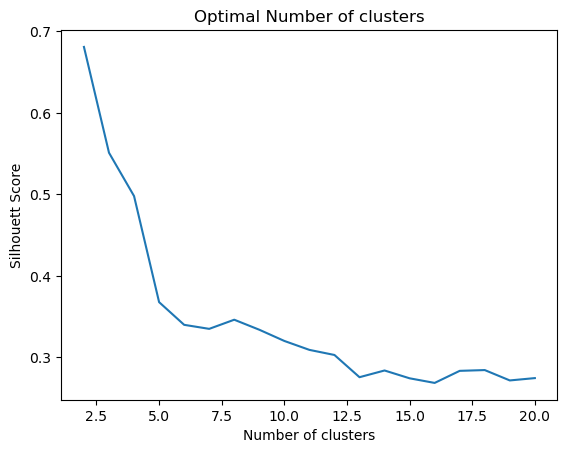

In [65]:
from sklearn.cluster import KMeans
silhouetteScore = [] 
for i in range(2, 21): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19,n_init='auto')
    ilabels = kmeans.fit_predict(X) 
    silhouetteScore.append(silhouette_score(X,ilabels))

plt.plot(range(2, 21), silhouetteScore)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouett Score') 
plt.title("Optimal Number of clusters")
plt.show()

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

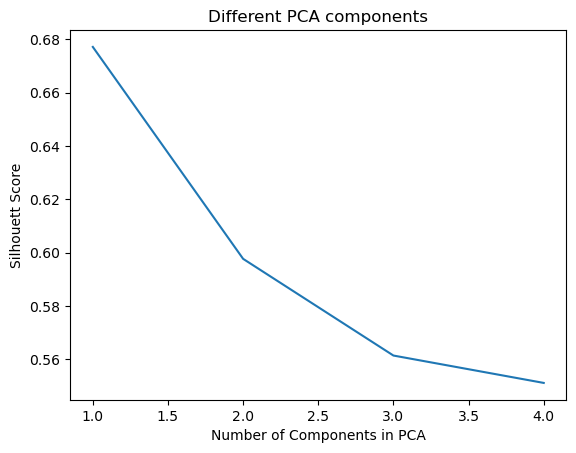

In [66]:
silhouetteScore = [] 
for i in range(1, 5): 
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 19,n_init='auto')
    ilabels = kmeans.fit_predict(applyPCA(i)) 
    silhouetteScore.append(silhouette_score(applyPCA(i),ilabels))

plt.plot(range(1, 5), silhouetteScore)
plt.xlabel('Number of Components in PCA')
plt.ylabel('Silhouett Score') 
plt.title("Different PCA components")
plt.show()


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

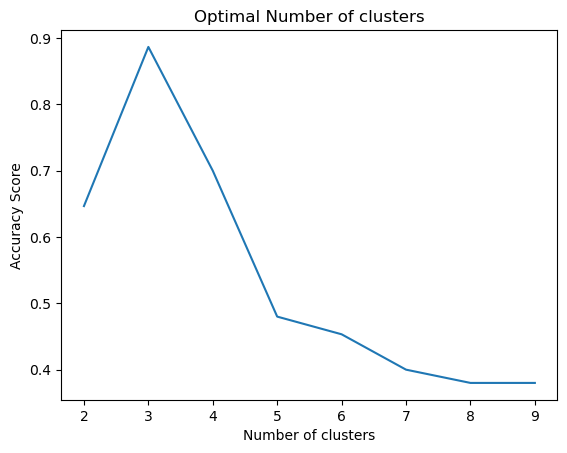

In [67]:
accuracyScore =[] 
for i in range(2, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19,n_init='auto')
    ilabels = kmeans.fit_predict(X) 
    accuracyScore.append(accuracy_score(y,ilabels))

plt.plot(range(2, 10), accuracyScore)
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy Score') 
plt.title("Optimal Number of clusters")
plt.show()

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

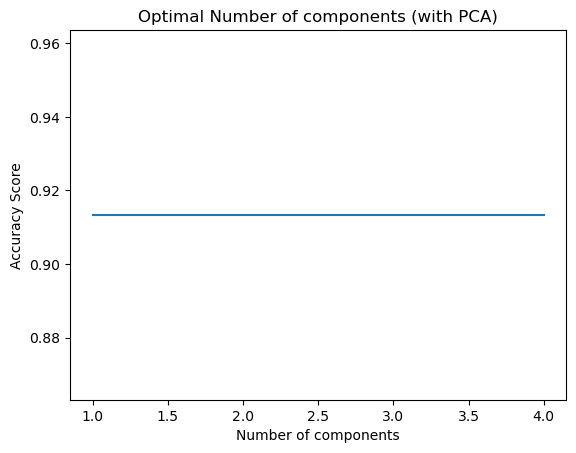

In [68]:
accuracyScore =[] 
for i in range(1, 5): 
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 19,n_init='auto')
    ilabels = kmeans.fit_predict(applyPCA(1)) 
    accuracyScore.append(accuracy_score(y,ilabels))

plt.plot(range(1, 5), accuracyScore)
plt.xlabel('Number of components')
plt.ylabel('Accuracy Score') 
plt.title("Optimal Number of components (with PCA)")
plt.show()

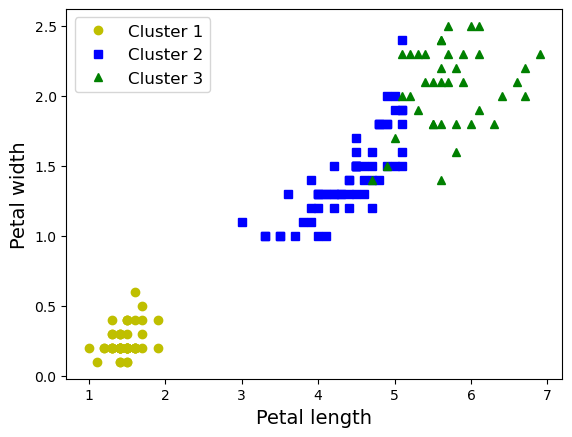

In [69]:

plt.plot(X[klabels==0, 2], X[klabels==0, 3], "yo", label="Cluster 1")
plt.plot(X[klabels==1, 2], X[klabels==1, 3], "bs", label="Cluster 2")
plt.plot(X[klabels==2, 2], X[klabels==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [70]:
import matplotlib.pyplot as plt

centeroids = kMeans.cluster_centers_
centeroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [71]:
agg = AgglomerativeClustering(n_clusters=3,linkage='ward')
aggLabels = agg.fit_predict(X)

agg_pca = AgglomerativeClustering(n_clusters=3,linkage='ward')
agg_labels_pca = agg_pca.fit_predict(applyPCA(1))

In [72]:
accuracy = accuracy_score(y,aggLabels )
accuracy_pca = accuracy_score(y,agg_labels_pca )
print("Accuracy (raw):", accuracy)
print("Accuracy (PCA):", accuracy_pca)

Accuracy (raw): 0.23333333333333334
Accuracy (PCA): 0.23333333333333334


In [73]:
silhouette_avg = silhouette_score(X, aggLabels)
print("Silhouette Score (raw):",silhouette_avg)
silhouette_avg_pca = silhouette_score(applyPCA(1), agg_labels_pca)
print("Silhouette Score (PCA):",silhouette_avg_pca)

Silhouette Score (raw): 0.5543236611296419
Silhouette Score (PCA): 0.6813749118738545


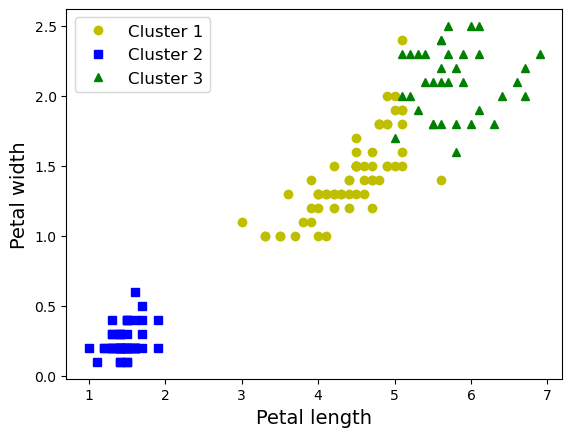

In [74]:
plt.plot(X[aggLabels==0, 2], X[aggLabels==0, 3], "yo", label="Cluster 1")
plt.plot(X[aggLabels==1, 2], X[aggLabels==1, 3], "bs", label="Cluster 2")
plt.plot(X[aggLabels==2, 2], X[aggLabels==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

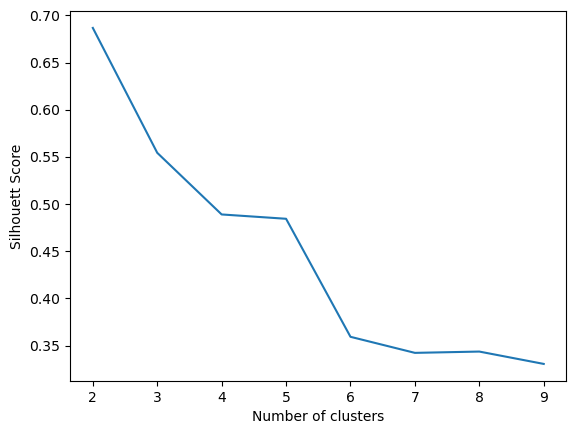

In [75]:
silhouetteScore = [] 
for i in range(2, 10): 
    agg = AgglomerativeClustering(n_clusters=i,linkage='ward')
    ilabels = agg.fit_predict(X) 
    silhouetteScore.append(silhouette_score(X,ilabels))

plt.plot(range(2, 10), silhouetteScore)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouett Score') 
plt.show()

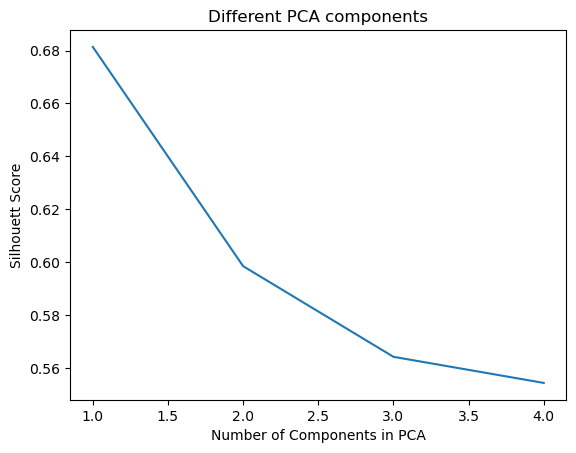

In [76]:
silhouetteScore = [] 
for i in range(1, 5): 
    agg = AgglomerativeClustering(n_clusters = 3)
    
    ilabels = agg.fit_predict(applyPCA(i)) 
    silhouetteScore.append(silhouette_score(applyPCA(i),ilabels))

plt.plot(range(1, 5), silhouetteScore)
plt.xlabel('Number of Components in PCA')
plt.ylabel('Silhouett Score') 
plt.title("Different PCA components")
plt.show()

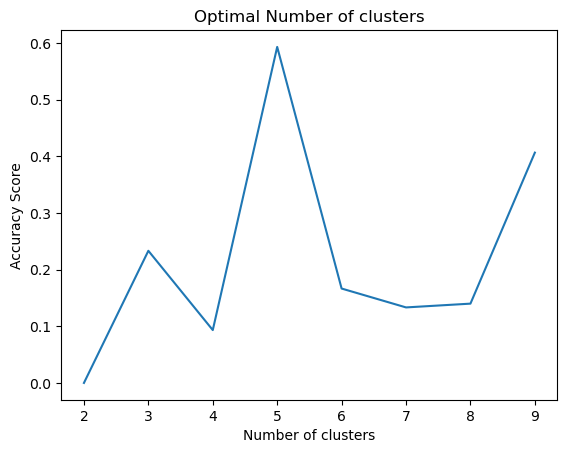

In [77]:
accuracyScore =[] 
for i in range(2, 10): 
    agg = AgglomerativeClustering(n_clusters=i,linkage='ward')
    ilabels = agg.fit_predict(X) 
    accuracyScore.append(accuracy_score(y,ilabels))

plt.plot(range(2, 10), accuracyScore)
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy Score') 
plt.title("Optimal Number of clusters")
plt.show()

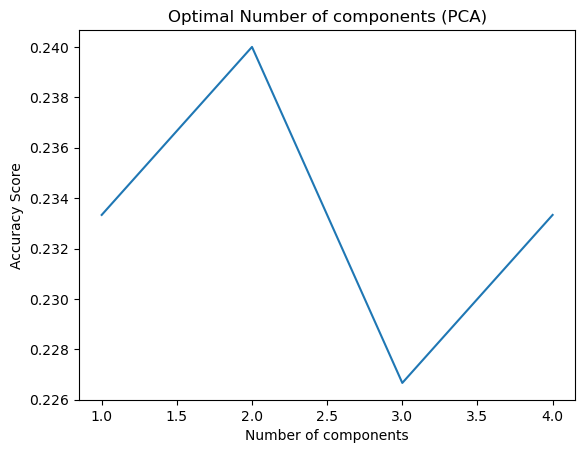

In [78]:
accuracyScore =[] 
for i in range(1, 5): 
    agg = AgglomerativeClustering(n_clusters = 3)
    ilabels = agg.fit_predict(applyPCA(i)) 
    accuracyScore.append(accuracy_score(y,ilabels))

plt.plot(range(1, 5), accuracyScore)
plt.xlabel('Number of components')
plt.ylabel('Accuracy Score') 
plt.title("Optimal Number of components (PCA)")
plt.show()

In [79]:
dbs = DBSCAN(eps=1,min_samples=10)
dbsLabels = dbs.fit_predict(X)

dbs_PCA = DBSCAN(eps=1,min_samples=10)
dbsLabels_PCA = dbs.fit_predict(applyPCA(1))

In [80]:
accuracy = accuracy_score(y,dbsLabels )
print("Accuracy (raw):", accuracy)
accuracy_PCA = accuracy_score(y,dbsLabels_PCA )
print("Accuracy (PCA):", accuracy_PCA)

Accuracy (raw): 0.6666666666666666
Accuracy (PCA): 0.6666666666666666


In [81]:
silhouette_avg = silhouette_score(X, dbsLabels)
print("Silhouette Score (raw):",silhouette_avg)
silhouette_avg_PCA = silhouette_score(applyPCA(1), dbsLabels_PCA)
print("Silhouette Score (PCA):",silhouette_avg_PCA)

Silhouette Score (raw): 0.6867350732769777
Silhouette Score (PCA): 0.7642453332157217


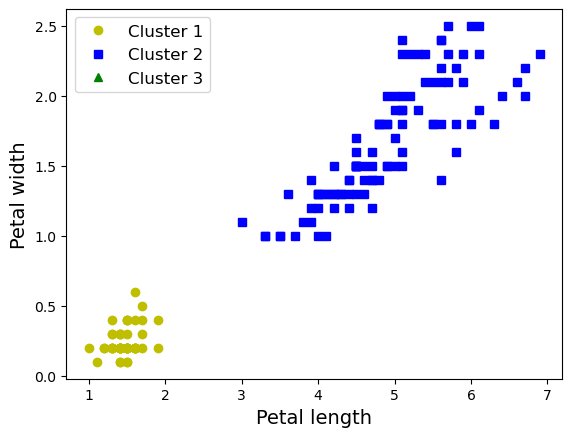

In [82]:
plt.plot(X[dbsLabels==0, 2], X[dbsLabels==0, 3], "yo", label="Cluster 1")
plt.plot(X[dbsLabels==1, 2], X[dbsLabels==1, 3], "bs", label="Cluster 2")
plt.plot(X[dbsLabels==2, 2], X[dbsLabels==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


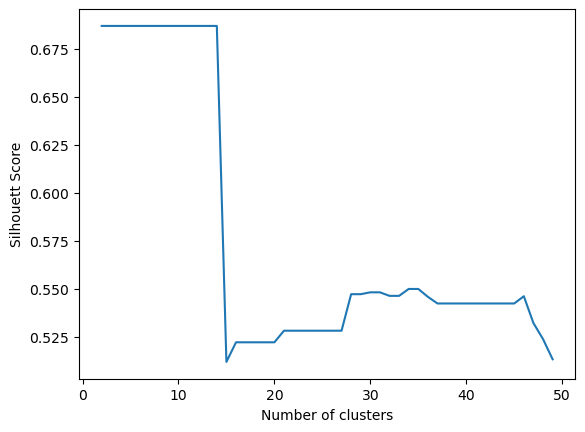

In [83]:
silhouetteScore = [] 
for i in range(2, 50): 
    dbs = DBSCAN(eps=1,min_samples=i)
    ilabels = dbs.fit_predict(X) 
    silhouetteScore.append(silhouette_score(X,ilabels))

plt.plot(range(2, 50), silhouetteScore)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouett Score') 
plt.show()

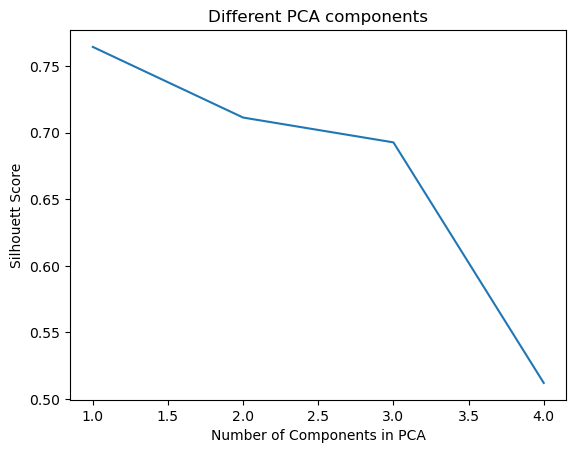

In [84]:
silhouetteScore = [] 
for i in range(1, 5): 
    agg = DBSCAN(eps=1,min_samples=15)
    ilabels = agg.fit_predict(applyPCA(i)) 
    silhouetteScore.append(silhouette_score(applyPCA(i),ilabels))

plt.plot(range(1, 5), silhouetteScore)
plt.xlabel('Number of Components in PCA')
plt.ylabel('Silhouett Score') 
plt.title("Different PCA components")
plt.show()

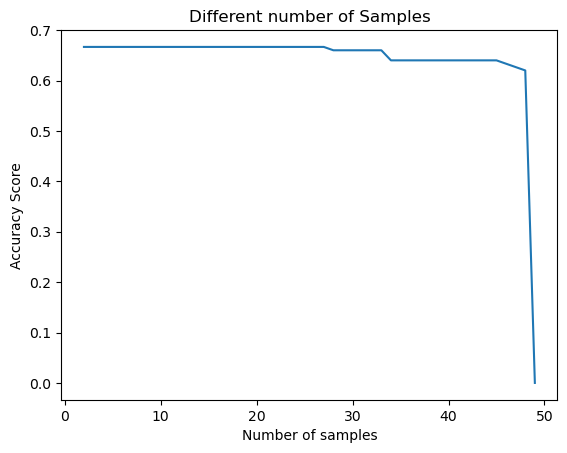

In [85]:
silhouetteScore = [] 
for i in range(2, 50): 
    dbs = DBSCAN(eps=1,min_samples=i)
    ilabels = dbs.fit_predict(X) 
    silhouetteScore.append(accuracy_score(y,ilabels))

plt.plot(range(2, 50), silhouetteScore)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy Score') 
plt.title("Different number of Samples")
plt.show()

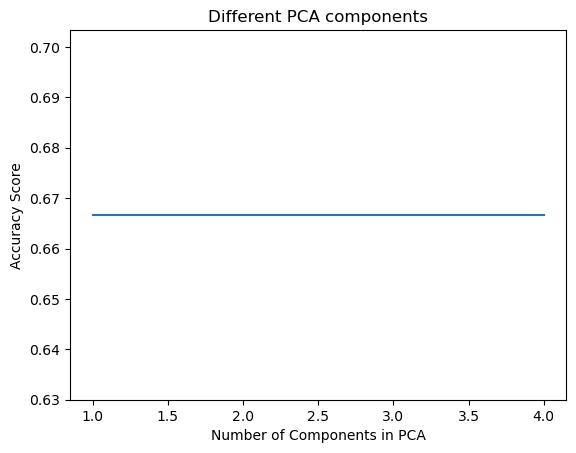

In [86]:
accuracyScore = [] 
for i in range(1, 5): 
    agg = DBSCAN(eps=1,min_samples=15)
    ilabels = agg.fit_predict(applyPCA(i)) 
    accuracyScore.append(accuracy_score(y,ilabels))

plt.plot(range(1, 5), accuracyScore)
plt.xlabel('Number of Components in PCA')
plt.ylabel('Accuracy Score') 
plt.title("Different PCA components")
plt.show()